In [1]:
import pandas as pd
import numpy as np
import os
import plotly.offline as py
py.init_notebook_mode(connected=False)
import plotly.graph_objs as go
import json
import cufflinks as cf
import seaborn as sns
cf.set_config_file(offline=True)
import json
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
import requests

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [137]:
idx = np.argmax(df.number_of_reviews)
print(df.host_name[idx], df.neighbourhood_group[idx], df.neighbourhood[idx], df.room_type[idx], df.price[idx],
     df.number_of_reviews[idx], df.last_review[idx], df.reviews_per_month[idx]);


Dona Queens Jamaica Private room 47 629 2019-07-05 14.58


In [141]:
df[df.number_of_reviews > 10].sort_values(by='number_of_reviews', ascending=True)

id                                               name    host_id  \
30708  23761645  2BR Wakefield Bronx 20 min NYC 10 min  Westche...   16851857   
40448  31354965                Sun-Drenched Artistic Uptown Studio   63411066   
33652  26658854        Sunny well-located room near Times Sq. 41D2  190921808   
8898    6813226                 Large 2BR 2BH duplex-Central Park!   24742173   
35557  28221653      Private Bedroom in Super Comfortable NYC Apt.  160611440   
...         ...                                                ...        ...   
13495  10101135                            Room Near JFK Twin Beds   47621202   
2015     891117                       Private Bedroom in Manhattan    4734398   
2030     903947                     Beautiful Bedroom in Manhattan    4734398   
2031     903972                         Great Bedroom in Manhattan    4734398   
11759   9145202                            Room near JFK Queen Bed   47621202   

      host_name neighbourhood_group       neighbourhood  latitude  longitude  \
30708      Paul               Bronx           Wakefield  40.89691  -73.85121   
40448     Caleb           Manhattan  Washington Heights  40.83340  -73.94327   
33652      John           Manhattan             Chelsea  40.75369  -73.99719   
8898      Tammy           Manhattan     Upper West Side  40.79866  -73.96810   
35557      Fran           Manhattan     Upper West Side  40.79912  -73.97064   
...         ...                 ...                 ...       ...        ...   
13495      Dona              Queens             Jamaica  40.66939  -73.76975   
2015         Jj           Manhattan              Harlem  40.82264  -73.94041   
2030         Jj           Manhattan              Harlem  40.82124  -73.93838   
2031         Jj           Manhattan              Harlem  40.82085  -73.94025   
11759      Dona              Queens             Jamaica  40.66730  -73.76831   

             room_type  price  minimum_nights  number_of_reviews last_review  \
30708  Entire home/apt     69              21                 11  2019-02-27   
40448  Entire home/apt     70               2                 11  2019-02-22   
33652     Private room     50               7                 11  2019-06-22   
8898   Entire home/apt    460               4                 11  2016-01-05   
35557     Private room     95               1                 11  2019-06-05   
...                ...    ...             ...                ...         ...   
13495     Private room     47               1                576  2019-06-27   
2015      Private room     49               1                594  2019-06-15   
2030      Private room     49               1                597  2019-06-23   
2031      Private room     49               1                607  2019-06-21   
11759     Private room     47               1                629  2019-07-05   

       reviews_per_month  calculated_host_listings_count  availability_365  
30708               0.75                               4               343  
40448               1.84                               1                 0  
33652               0.99                              47               358  
8898                0.23                               3                 0  
35557               1.11                               1                 0  
...                  ...                             ...               ...  
13495              13.40                               2               173  
2015                7.57                               3               339  
2030                7.72                               3               342  
2031                7.75                               3               293  
11759              14.58                               2               333  

[18572 rows x 16 columns]

In [76]:
print(df['neighbourhood_group'].value_counts())
print('')
print(df['room_type'].value_counts())

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


In [125]:
temp = df.groupby(['neighbourhood_group', 'neighbourhood'])['price'].agg(['mean', 'count']).reset_index()
temp = temp.sort_values('mean', ascending=False).reset_index(drop=True)
temp

neighbourhood_group   neighbourhood        mean  count
0         Staten Island  Fort Wadsworth  800.000000      1
1         Staten Island         Woodrow  700.000000      1
2             Manhattan         Tribeca  490.638418    177
3              Brooklyn        Sea Gate  487.857143      7
4                 Bronx       Riverdale  442.090909     11
..                  ...             ...         ...    ...
216       Staten Island        New Dorp   57.000000      1
217               Bronx       Soundview   53.466667     15
218               Bronx         Tremont   51.545455     11
219               Bronx     Hunts Point   50.500000     18
220       Staten Island     Bull's Head   47.333333      6

[221 rows x 4 columns]

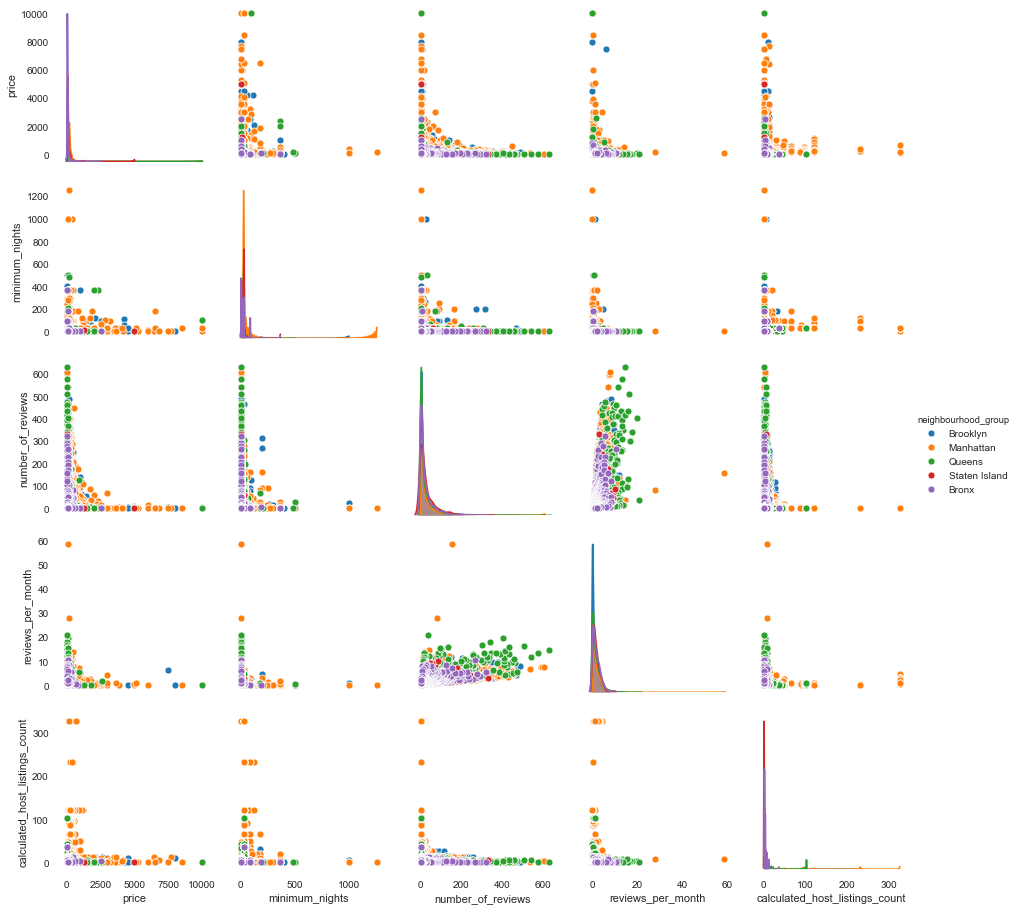

In [101]:
cols = ['neighbourhood_group', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count']
sns.pairplot(df[cols], hue="neighbourhood_group");

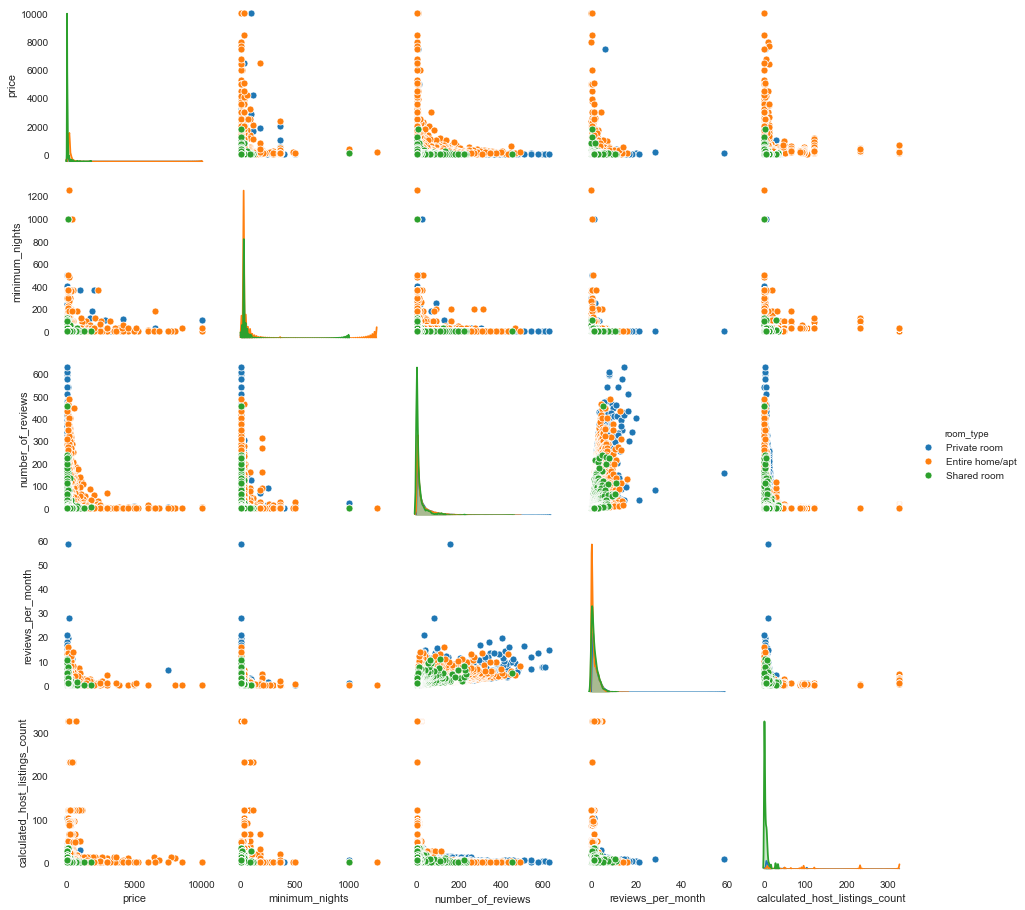

In [102]:
cols = ['room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count']
sns.pairplot(df[cols], hue="room_type");

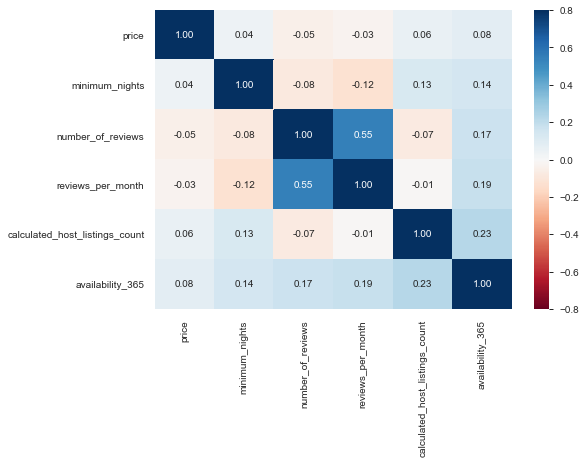

In [103]:
cols = ['room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 
        'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

df_corr = df[cols].corr()
sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='RdBu', vmax=0.8, vmin=-0.8)
plt.show();

[]

<Figure size 720x432 with 0 Axes>

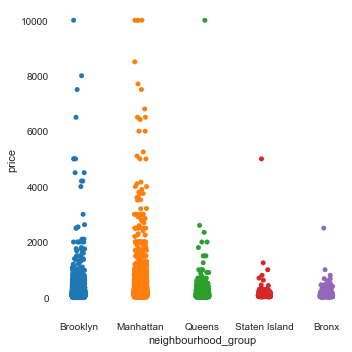

In [152]:
plt.figure(figsize=(10, 6))
sns.catplot(data=df, x='neighbourhood_group', y='price');
plt.plot()

[]

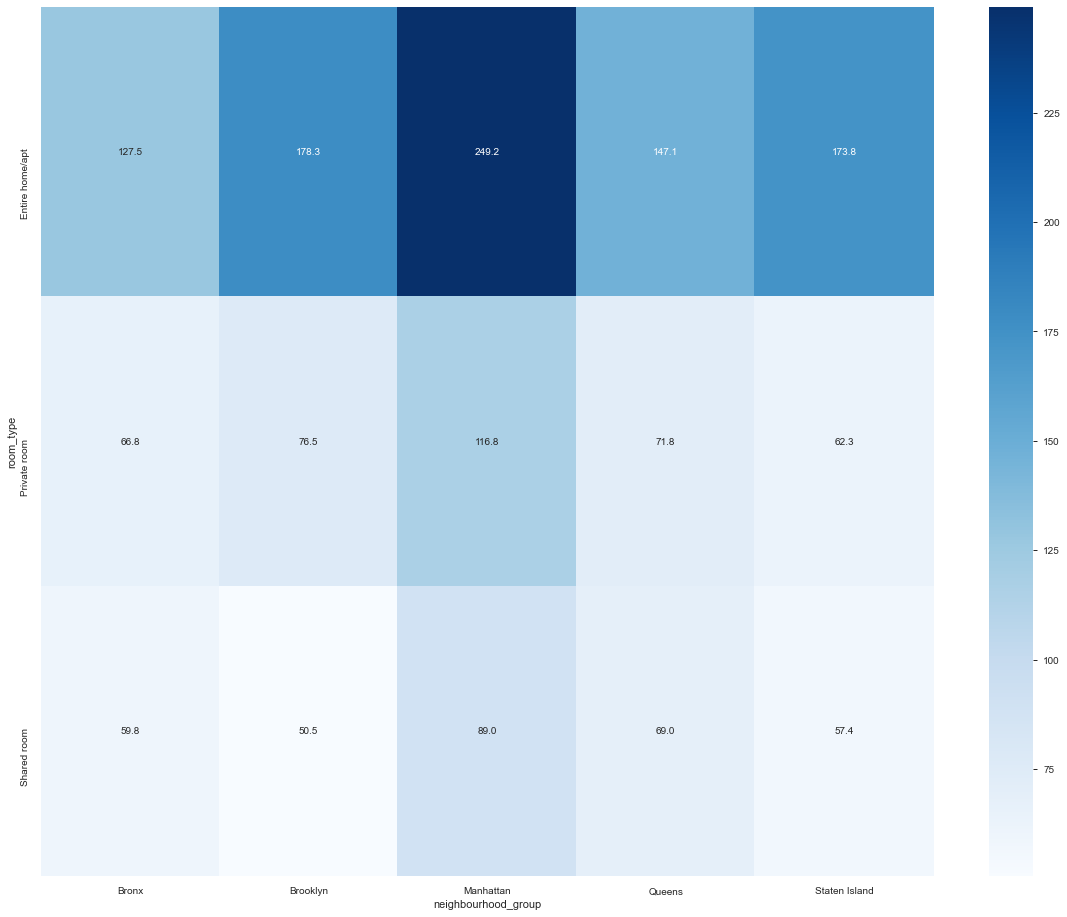

In [157]:
plt.figure(figsize=(20,16))
df_pivot = df.pivot_table(values='price', index='room_type', columns='neighbourhood_group', aggfunc='mean')
sns.heatmap(df_pivot, annot=True, fmt='.1f', cmap='Blues')
plt.plot()

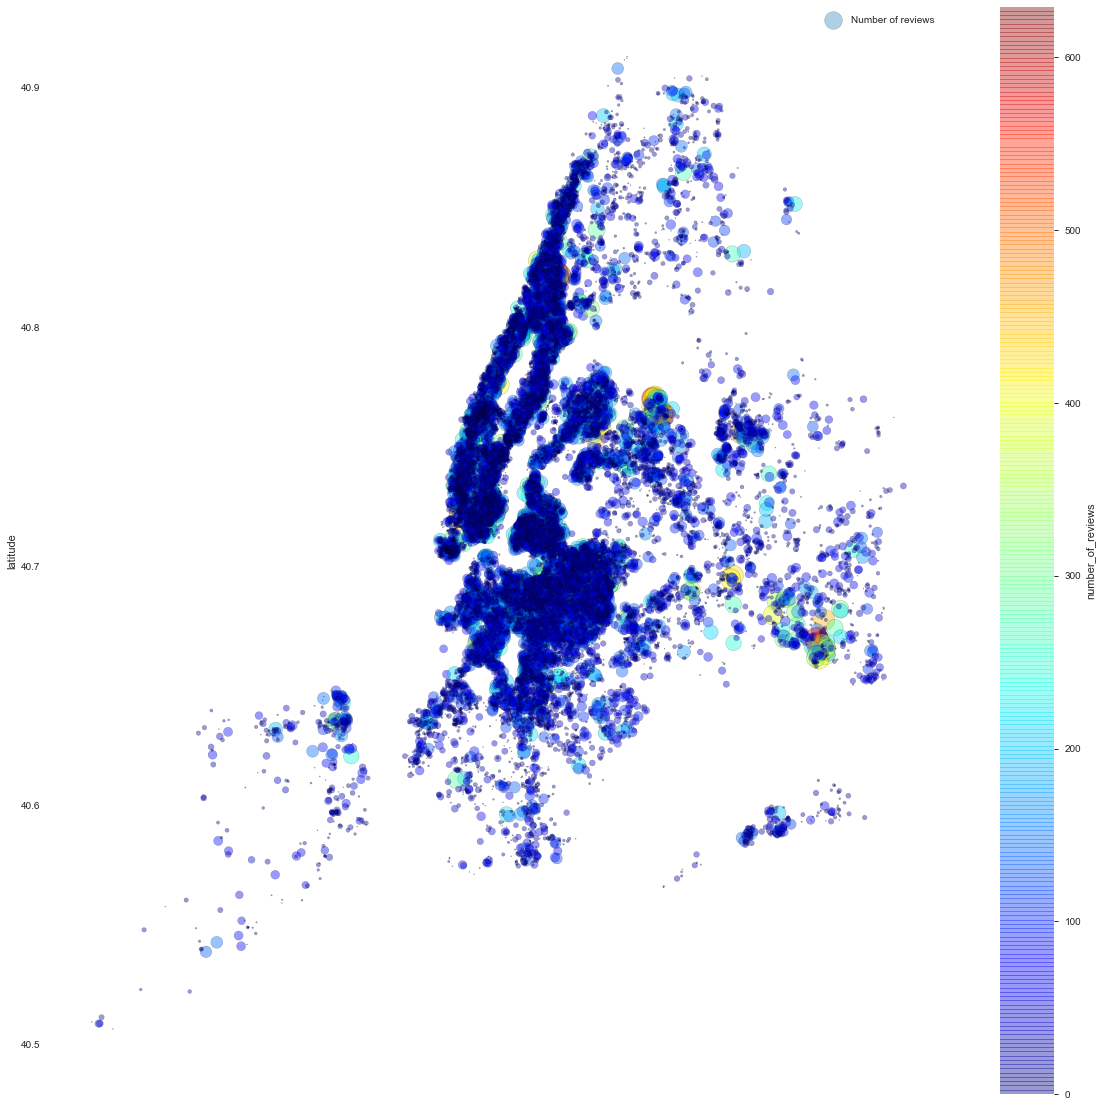

In [33]:
plot = df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(20,20), edgecolor="black", 
            s=df["number_of_reviews"], label='Number of reviews', c="number_of_reviews", cmap=plt.get_cmap("jet"), 
            colorbar=True);

In [166]:
tmp = df[df.number_of_reviews > 10].sort_values(by='number_of_reviews', ascending=True)
tmp_price_under_2k = tmp[tmp.price < 2000].sort_values(by='price', ascending=True)

In [167]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18572 entries, 30708 to 11759
Data columns (total 16 columns):
id                                18572 non-null int64
name                              18571 non-null object
host_id                           18572 non-null int64
host_name                         18562 non-null object
neighbourhood_group               18572 non-null object
neighbourhood                     18572 non-null object
latitude                          18572 non-null float64
longitude                         18572 non-null float64
room_type                         18572 non-null object
price                             18572 non-null int64
minimum_nights                    18572 non-null int64
number_of_reviews                 18572 non-null int64
last_review                       18572 non-null object
reviews_per_month                 18572 non-null float64
calculated_host_listings_count    18572 non-null int64
availability_365                  18572 non-null i

In [168]:
tmp_price_under_2k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18560 entries, 25433 to 3306
Data columns (total 16 columns):
id                                18560 non-null int64
name                              18559 non-null object
host_id                           18560 non-null int64
host_name                         18550 non-null object
neighbourhood_group               18560 non-null object
neighbourhood                     18560 non-null object
latitude                          18560 non-null float64
longitude                         18560 non-null float64
room_type                         18560 non-null object
price                             18560 non-null int64
minimum_nights                    18560 non-null int64
number_of_reviews                 18560 non-null int64
last_review                       18560 non-null object
reviews_per_month                 18560 non-null float64
calculated_host_listings_count    18560 non-null int64
availability_365                  18560 non-null in

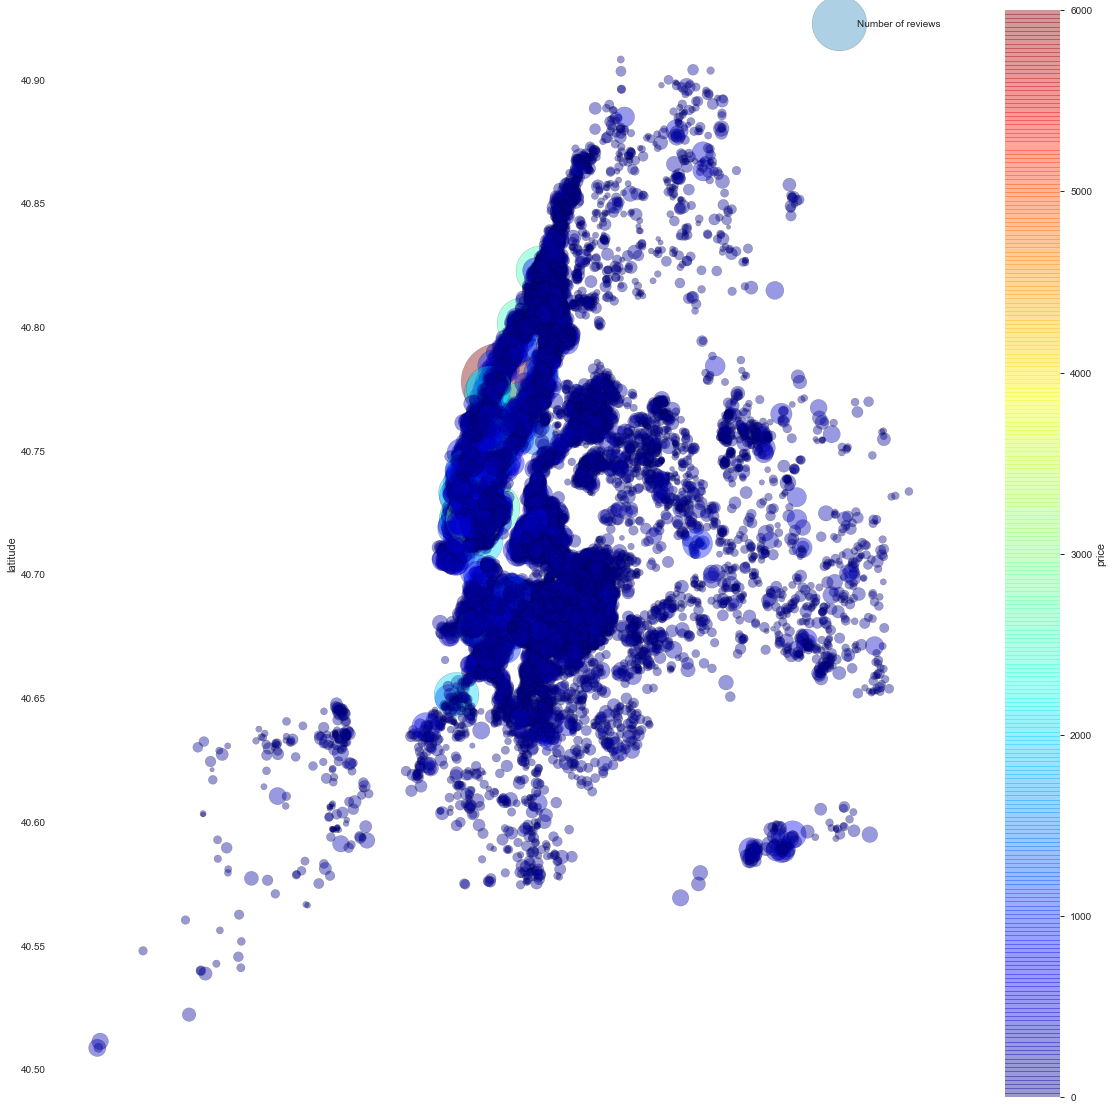

In [169]:
tmp.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(20,20), edgecolor="black", 
        s=tmp["price"], label='Number of reviews', c="price",
        cmap=plt.get_cmap("jet"), colorbar=True);

/Users/akukelo/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/Users/akukelo/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

/Users/akukelo/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/Users/akukelo/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplo

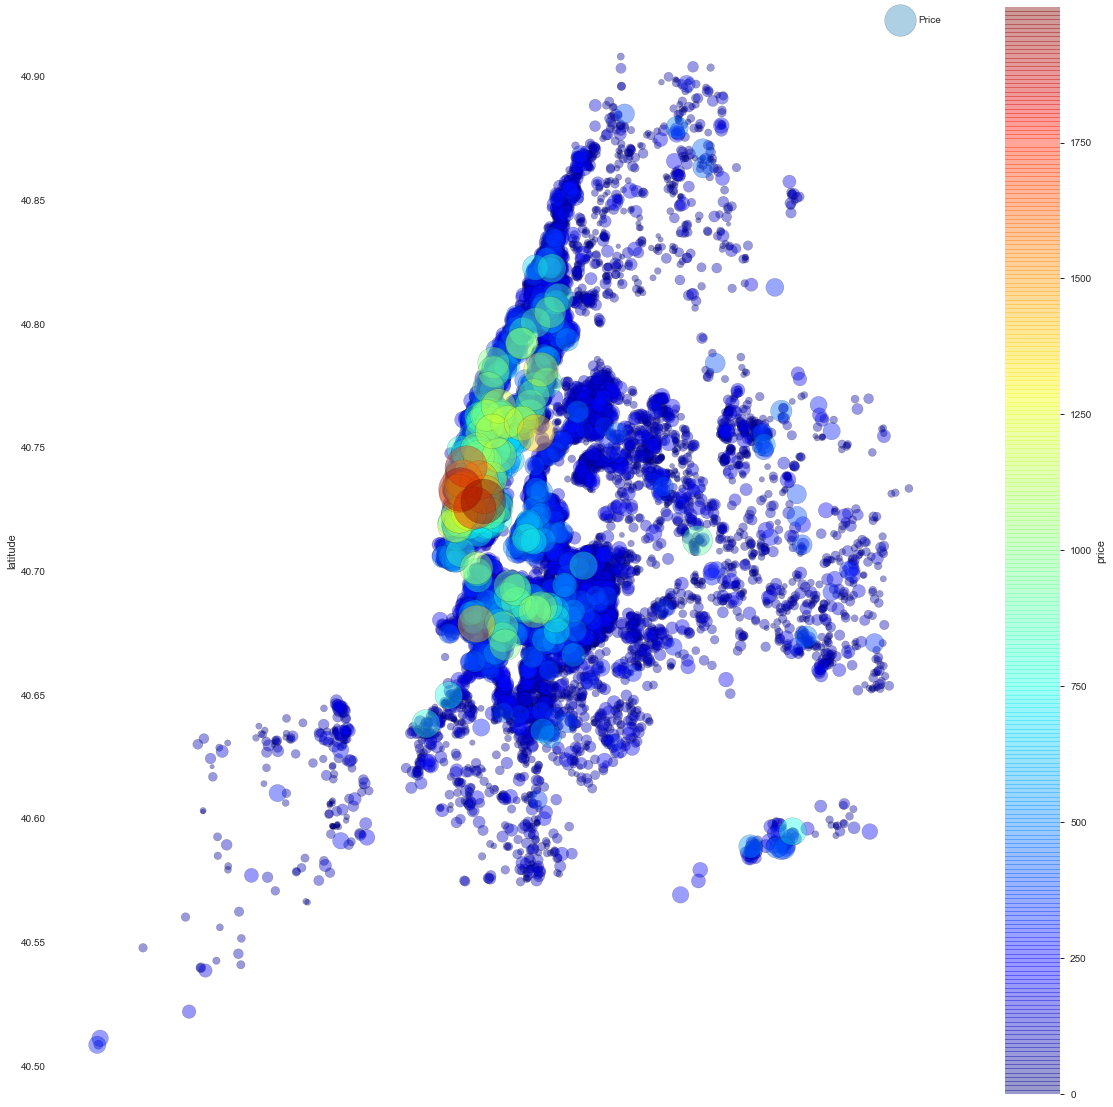

In [171]:
tmp_price_under_2k.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(20,20), edgecolor="black", 
        s=tmp_price_under_2k["price"], label='Price', c="price",
        cmap=plt.get_cmap("jet"), colorbar=True);